<a href="https://colab.research.google.com/github/janel-dsbc/Deep-Dive-Projects/blob/main/Final_Project6_DeepLearningImages.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Images for Deep Learning

Data:

https://ddc-datascience.s3.amazonaws.com/Projects/Project.6-Images/Data/X.pickle

https://ddc-datascience.s3.amazonaws.com/Projects/Project.6-Images/Data/y.pickle

https://ddc-datascience.s3.amazonaws.com/Projects/Project.6-Images/Data/dog.jpg



Enable the GPU runtime processing in your Jupyter notebook.



## Problem Definition



* Concise problem definition:  This project will classify new, unseen images of mostly cats and dogs utilizing deep learning.
* Load necessary packages.



In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import requests
import matplotlib.pyplot as plt
import tensorflow.keras as keras
import tensorflow as tf

from sklearn import datasets
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.utils import plot_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import cv2


## Data Collection



* Load pickled data from X.pickle and y.pickle from the AWS S3 bucket.



In [ ]:
# URLs of the pickle file
urlx = 'https://ddc-datascience.s3.amazonaws.com/Projects/Project.6-Images/Data/X.pickle'
urly = 'https://ddc-datascience.s3.amazonaws.com/Projects/Project.6-Images/Data/y.pickle'
urltest = 'https://ddc-datascience.s3.amazonaws.com/Projects/Project.6-Images/Data/dog.jpg'

In [ ]:
# URL of the pickle file
urlx = 'https://ddc-datascience.s3.amazonaws.com/Projects/Project.6-Images/Data/X.pickle'

# Download the file
response = requests.get(urlx)
file_content = response.content

# Unpickle the file
datax = pickle.loads(file_content)

# Print or use the data
datax[0]

array([[[ 95],
        [ 94],
        [ 98],
        ...,
        [170],
        [172],
        [171]],

       [[ 92],
        [ 91],
        [ 95],
        ...,
        [170],
        [172],
        [171]],

       [[ 89],
        [ 91],
        [ 92],
        ...,
        [165],
        [169],
        [169]],

       ...,

       [[ 84],
        [ 76],
        [ 73],
        ...,
        [135],
        [164],
        [154]],

       [[ 82],
        [ 79],
        [ 71],
        ...,
        [142],
        [134],
        [153]],

       [[ 80],
        [ 85],
        [ 85],
        ...,
        [151],
        [146],
        [138]]], dtype=uint8)

In [ ]:
type(datax)

numpy.ndarray

In [ ]:
# URL of the pickle file
urly = 'https://ddc-datascience.s3.amazonaws.com/Projects/Project.6-Images/Data/y.pickle'

# Download the file
response = requests.get(urly)
file_content = response.content

# Unpickle the file
datay = pickle.loads(file_content)

# Print or use the data
datay[0:2]

[0, 1]

In [ ]:
type(datay)

list

## Data Cleaning



* Scale the values in X so that they fall between 0 and 1 by dividing by 255.  We ensure the largest number in the array is 255 by utilizing the max function.  



In [ ]:
maxx = datax.max()

In [ ]:
maxx

255

In [ ]:
datax = datax/maxx

Take a peek at some of the array at index 0.

In [ ]:
datax[0]

array([[[0.37254902],
        [0.36862745],
        [0.38431373],
        ...,
        [0.66666667],
        [0.6745098 ],
        [0.67058824]],

       [[0.36078431],
        [0.35686275],
        [0.37254902],
        ...,
        [0.66666667],
        [0.6745098 ],
        [0.67058824]],

       [[0.34901961],
        [0.35686275],
        [0.36078431],
        ...,
        [0.64705882],
        [0.6627451 ],
        [0.6627451 ]],

       ...,

       [[0.32941176],
        [0.29803922],
        [0.28627451],
        ...,
        [0.52941176],
        [0.64313725],
        [0.60392157]],

       [[0.32156863],
        [0.30980392],
        [0.27843137],
        ...,
        [0.55686275],
        [0.5254902 ],
        [0.6       ]],

       [[0.31372549],
        [0.33333333],
        [0.33333333],
        ...,
        [0.59215686],
        [0.57254902],
        [0.54117647]]])

## Exploratory Data Analysis



* Look at the shape of X and y. Ensure that X is 4 dimensional.

* Plot one of the images in X using plt.imshow().

* Look at the response value in y for that image.



X (which I have called datax) is indeed 4 dimensional with dimensions:  (24946, 100, 100, 1)

In [ ]:
datax.shape

(24946, 100, 100, 1)

In [ ]:
len(datay)

24946

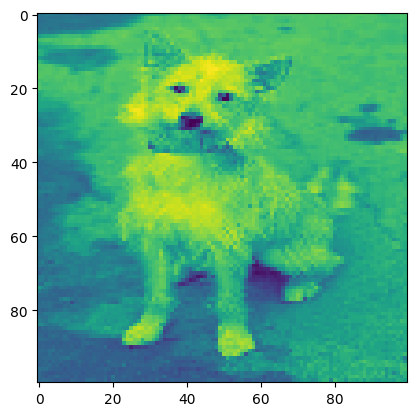

In [ ]:
plt.imshow(datax[0])

The response value in y (array datay) for a dog is 0.  

In [ ]:
datay[0]

0

## Data Processing



* Split X and y into training and testing sets.

*  Build a neural network with the following:
  * Sequential layers
  * At least two 2D convolutional layers using the 'relu' activation function and a (3,3) kernel size.
  * A MaxPooling2D layer after each 2D convolutional layer that has a pool size of (2,2).
  * A dense output layer using the 'sigmoid' activation function.
  Note: you can play around with the number of layers and nodes to try to get better performance.

* Compile your model. Use the 'adam' optimizer. Determine which loss function and metric is most appropriate for this problem.

* Fit your model using the training set.

* Evaluate your model using the testing set.

* Define a function that will read in a new image and convert it to a 4 dimensional array of pixels. Hint: numpy.ndarray.reshape

* Use the function defined above to read in the dog.jpg image that is saved in the AWS S3 bucket.

* Use the neural network you created to predict whether the image is a dog or a cat.



I experimented with choosing different random states.  Initially the random state was 42.  When it came to predicting whether our test image was a dog or cat (it is a dog in a cone), it was mostly predicting with a higher probability that the image was a cat.  This still occurred with 8 epochs.  As soon as I changed the random state to a 1, the model gave a probability that was closer to 0 (more accurately predicting a dog).

In [ ]:
# Split the data up in train and test sets
x_train, x_test, y_train, y_test = train_test_split(datax, datay, test_size=0.25, random_state=1)

In [ ]:
(
  type(x_train),
  type(y_train),
  type(x_test),
  type(y_test)
)


(numpy.ndarray, list, numpy.ndarray, list)

In [ ]:
(
  x_train.shape,
  len(y_train),
  x_test.shape,
  len(y_train)
)


((18709, 100, 100, 1), 18709, (6237, 100, 100, 1), 18709)

In [ ]:
x_train.shape

(18709, 100, 100, 1)

In [ ]:
#Shape of one single image
x_train.shape[1:]

(100, 100, 1)

In [ ]:
x_train[0]

array([[[0.40392157],
        [0.35294118],
        [0.31372549],
        ...,
        [0.19215686],
        [0.16862745],
        [0.16470588]],

       [[0.45098039],
        [0.35686275],
        [0.32156863],
        ...,
        [0.18431373],
        [0.18039216],
        [0.16078431]],

       [[0.14901961],
        [0.17254902],
        [0.16862745],
        ...,
        [0.1254902 ],
        [0.1372549 ],
        [0.12941176]],

       ...,

       [[0.22745098],
        [0.21960784],
        [0.21960784],
        ...,
        [0.25490196],
        [0.25098039],
        [0.25098039]],

       [[0.22352941],
        [0.22352941],
        [0.22745098],
        ...,
        [0.25098039],
        [0.25098039],
        [0.25098039]],

       [[0.22352941],
        [0.22352941],
        [0.22745098],
        ...,
        [0.25098039],
        [0.25098039],
        [0.25098039]]])

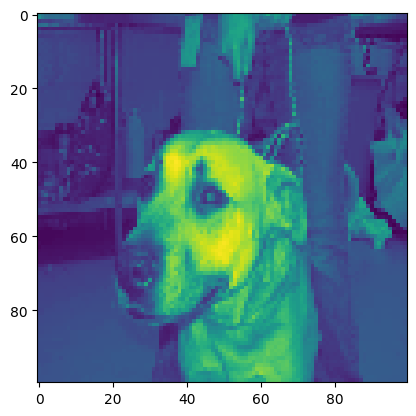

In [ ]:
# Visualize one of the training samples , cmap = plt.cm.gray_r
plt.imshow( x_train[0] )
plt.show()

In [ ]:
# See the response for that sample
y_train[0]

0

In [ ]:
x_train.min()

0.0

In [ ]:
x_train.max()

1.0

In [ ]:
x_test.min()

0.0

In [ ]:
x_test.max()

1.0

In [ ]:
# View data to ensure that our data is normalized (values are between 0 and 1)
x_train[0][5]

array([[0.2       ],
       [0.17254902],
       [0.18823529],
       [0.17647059],
       [0.18039216],
       [0.19607843],
       [0.2       ],
       [0.18431373],
       [0.18823529],
       [0.18039216],
       [0.17254902],
       [0.16470588],
       [0.15686275],
       [0.14901961],
       [0.14901961],
       [0.14901961],
       [0.05490196],
       [0.21960784],
       [0.06666667],
       [0.14901961],
       [0.08627451],
       [0.18039216],
       [0.09803922],
       [0.14509804],
       [0.15686275],
       [0.15294118],
       [0.13333333],
       [0.1372549 ],
       [0.1372549 ],
       [0.1254902 ],
       [0.12156863],
       [0.1254902 ],
       [0.11764706],
       [0.11372549],
       [0.10588235],
       [0.10588235],
       [0.09411765],
       [0.10196078],
       [0.09411765],
       [0.18823529],
       [0.45098039],
       [0.44705882],
       [0.42745098],
       [0.45490196],
       [0.18431373],
       [0.21960784],
       [0.21176471],
       [0.227

In [ ]:
#x_train = tf.keras.utils.normalize(x_train, axis=1)
#x_test = tf.keras.utils.normalize(x_test, axis=1)

In [ ]:
# View after normalization
x_train[0][10]

array([[0.2       ],
       [0.19215686],
       [0.2       ],
       [0.18823529],
       [0.18039216],
       [0.18431373],
       [0.19215686],
       [0.18823529],
       [0.19607843],
       [0.18823529],
       [0.18431373],
       [0.18039216],
       [0.17647059],
       [0.17647059],
       [0.16470588],
       [0.16862745],
       [0.12156863],
       [0.21176471],
       [0.08235294],
       [0.16470588],
       [0.0745098 ],
       [0.21960784],
       [0.12941176],
       [0.16078431],
       [0.17647059],
       [0.16862745],
       [0.17254902],
       [0.16862745],
       [0.16862745],
       [0.17254902],
       [0.17254902],
       [0.17254902],
       [0.17254902],
       [0.16862745],
       [0.16862745],
       [0.16862745],
       [0.16862745],
       [0.16862745],
       [0.22745098],
       [0.43529412],
       [0.45882353],
       [0.44705882],
       [0.4745098 ],
       [0.3254902 ],
       [0.23137255],
       [0.27058824],
       [0.2745098 ],
       [0.290

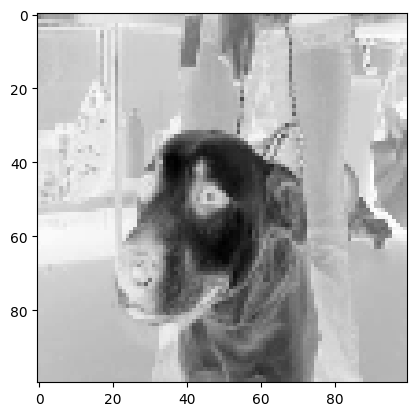

In [ ]:
plt.imshow(x_train[0],cmap=plt.cm.gray_r)
plt.show()

## CNN Model

### Build Model

In [ ]:
model = Sequential()

#Define input layer and first hidden layer
model.add(Conv2D(64, (3,3), input_shape = x_train.shape[1:], activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

#Define second hidden layer
model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

#Flatten datta to be used in output layer
model.add(Flatten())

#Define output layer
model.add(
  Dense(
    name = "output",
    units = 1,
    activation = 'sigmoid' ,
  )
)

###Compile Model

In [ ]:
# Using binary cross entropy loss function and accuracy as metric since we are doing a binary prediction
model.compile(
  optimizer = 'adam',
  loss = 'binary_crossentropy',
  metrics = ['accuracy']
)

###Fit Model

In [ ]:
type(x_train)

numpy.ndarray

In [ ]:
type(y_train)

list

In [ ]:
y_train = np.array(y_train)

In [ ]:
type(y_train)

numpy.ndarray

In [ ]:
y_test = np.array(y_test)

In [ ]:
type(y_test)

numpy.ndarray

In [ ]:
model.fit(x_train, y_train, epochs=8) ;

Epoch 1/8
585/585 [==============================] - 12s 13ms/step - loss: 0.6333 - accuracy: 0.6348
Epoch 2/8
585/585 [==============================] - 7s 12ms/step - loss: 0.5302 - accuracy: 0.7334
Epoch 3/8
585/585 [==============================] - 7s 13ms/step - loss: 0.4828 - accuracy: 0.7696
Epoch 4/8
585/585 [==============================] - 7s 12ms/step - loss: 0.4419 - accuracy: 0.7960
Epoch 5/8
585/585 [==============================] - 7s 13ms/step - loss: 0.4124 - accuracy: 0.8103
Epoch 6/8
585/585 [==============================] - 9s 16ms/step - loss: 0.3776 - accuracy: 0.8322
Epoch 7/8
585/585 [==============================] - 10s 17ms/step - loss: 0.3498 - accuracy: 0.8491
Epoch 8/8
585/585 [==============================] - 7s 13ms/step - loss: 0.3189 - accuracy: 0.8620


In [ ]:
model.metrics[1].metrics

[]

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 49, 49, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 23, 23, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 33856)             0         
                                                                 
 output (Dense)              (None, 1)                 3

###Evaluate Model

In [ ]:
loss, accuracy = model.evaluate(x_test, y_test)
print(accuracy)

195/195 [==============================] - 1s 6ms/step - loss: 0.4833 - accuracy: 0.7916
0.7915664315223694


variance vs bias trade-off

###Use model for prediction

In [ ]:
predictions = model.predict(x_test)

195/195 [==============================] - 1s 4ms/step


In [ ]:
type(predictions)

numpy.ndarray

In [ ]:
[ print(f"{k}: {x:.2f}") for k, x in enumerate(predictions[4]*100) ]

0: 2.12


[None]

In [ ]:
x_test.shape

(6237, 100, 100, 1)

In [ ]:
predictions.shape

(6237, 1)

In [ ]:
predictions[1]

array([0.29082125], dtype=float32)

In [ ]:
print(np.argmax(predictions[250]))

0


In [ ]:
y_test[250]

1

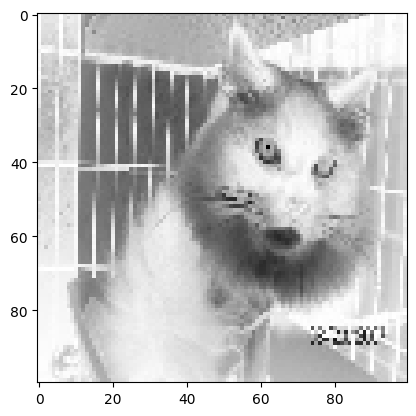

In [ ]:
plt.imshow(x_test[250], cmap=plt.cm.gray_r)
plt.show()

In [ ]:
filter = ( predictions > 0.5 )
filter[:10]


array([[ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False]])

In [ ]:
# Get class prediction by converting boolean to integers
class_pred = filter.astype("int32")
class_pred[1]

array([0], dtype=int32)

In [ ]:
# Compare to true value
np.where(y_test == 1)

(array([   0,    5,    8, ..., 6229, 6231, 6234]),)

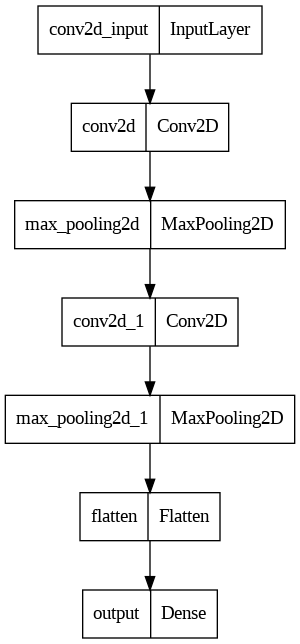

In [ ]:
plot_model(model)

In [ ]:
predictions[:10]

array([[0.9817499 ],
       [0.29082125],
       [0.00132113],
       [0.57829195],
       [0.02119108],
       [0.26719213],
       [0.15112208],
       [0.00581311],
       [0.984204  ],
       [0.18485661]], dtype=float32)

In [ ]:
predictions.shape

(6237, 1)

In [ ]:
results = pd.DataFrame( {
  "Truth": y_test,
  "Prediction": predictions[:,0],
  "Class": class_pred[:,0],
} )

In [ ]:
results

,Truth,Prediction,Class
0,1,0.981750,1
1,0,0.290821,0
2,0,0.001321,0
3,0,0.578292,1
4,0,0.021191,0
...,...,...,...
6232,0,0.691468,1
6233,0,0.378003,0
6234,1,0.667175,1
6235,0,0.062458,0


Define a function that will read in a new image and convert it to a 4 dimensional array of pixels (ask the instructor for help with this). Hint: numpy.ndarray.reshape

Use the function defined above to read in the dog.jpg image that is saved in the AWS S3 bucket.

In [ ]:
!wget "https://ddc-datascience.s3.amazonaws.com/Projects/Project.6-Images/Data/dog.jpg"
img_grayscale = cv2.imread('dog.jpg',0)

--2024-07-22 15:06:40--  https://ddc-datascience.s3.amazonaws.com/Projects/Project.6-Images/Data/dog.jpg
Resolving ddc-datascience.s3.amazonaws.com (ddc-datascience.s3.amazonaws.com)... 52.219.120.2, 52.219.112.170, 52.219.220.153, ...
Connecting to ddc-datascience.s3.amazonaws.com (ddc-datascience.s3.amazonaws.com)|52.219.120.2|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60603 (59K) [image/jpeg]
Saving to: ‘dog.jpg’

dog.jpg             100%[===================>]  59.18K  --.-KB/s    in 0.03s   

2024-07-22 15:06:40 (1.90 MB/s) - ‘dog.jpg’ saved [60603/60603]



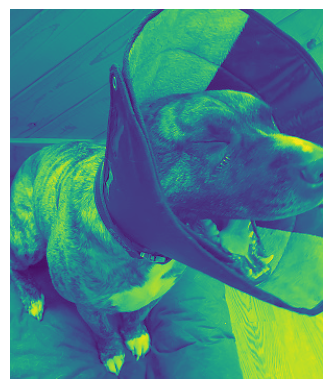

In [ ]:
plt.imshow((img_grayscale))
plt.axis("off")
plt.show()

In [ ]:
img_grayscale[0]

array([106, 105, 105, 104, 104, 103, 102, 101, 102, 103, 102,  99,  98,
       101, 104, 105, 104, 104, 108, 109, 104, 105, 110, 109, 109, 103,
       106, 108,  97,  91,  83,  75, 104, 115, 113, 131, 128, 113, 109,
       110, 118, 120, 115, 116, 115, 117, 113, 112, 121, 118, 114, 111,
       110, 112, 119, 126, 121, 121, 122, 124, 126, 126, 127, 128, 129,
       124, 127, 129, 126, 127, 126, 118, 112, 124, 132, 131, 129, 131,
       132, 129, 134, 133, 132, 131, 133, 135, 134, 132, 135, 133, 132,
       133, 134, 135, 133, 132, 134, 135, 135, 135, 135, 135, 134, 133,
       136, 137, 132, 132, 136, 134, 131, 129, 132, 132, 136, 136, 133,
       111,  75, 112, 138, 138, 135, 131, 128, 122, 121, 125, 130, 130,
       129, 123, 122, 126, 122, 135, 134, 159, 145, 121, 109,  83,  74,
        59,  39,  37,  29,  62, 163, 166, 178, 175, 180, 182, 181, 177,
       172, 183, 189, 186, 188, 178, 174, 167, 164, 169, 171, 178, 182,
       181, 183, 183, 180, 179, 179, 177, 175, 166, 166, 169, 16

In [ ]:
img_grayscale.max()

255

In [ ]:
img_grayscale = img_grayscale/255

In [ ]:
img_grayscale[:100]

array([[0.41568627, 0.41176471, 0.41176471, ..., 0.6       , 0.60392157,
        0.60784314],
       [0.40784314, 0.40392157, 0.40392157, ..., 0.6       , 0.60784314,
        0.61176471],
       [0.4       , 0.4       , 0.39607843, ..., 0.60784314, 0.61176471,
        0.61176471],
       ...,
       [0.31372549, 0.31372549, 0.31764706, ..., 0.23529412, 0.23137255,
        0.23137255],
       [0.31372549, 0.30980392, 0.30588235, ..., 0.22352941, 0.21960784,
        0.22352941],
       [0.31372549, 0.31372549, 0.31372549, ..., 0.21176471, 0.20784314,
        0.21568627]])

In [ ]:
img_grayscale.max(),img_grayscale.min()

(1.0, 0.011764705882352941)

In [ ]:
img_grayscale.shape

(355, 300)

## Function with CV2

In [ ]:
test_path = '/content/dog.jpg'

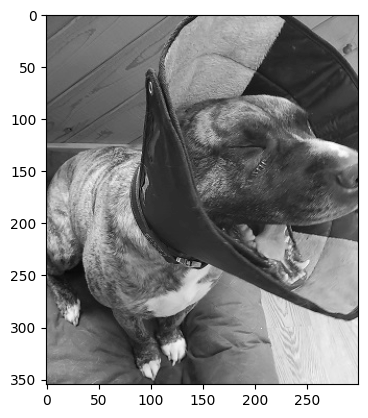

In [ ]:
dog_in = (test_path)
image_array = cv2.imread(dog_in, cv2.IMREAD_GRAYSCALE)
plt.imshow(image_array, cmap = 'gray')
plt.show()

In [ ]:
def prepare(testpath):
  img_size = 100
  img_array = cv2.imread(testpath,cv2.IMREAD_GRAYSCALE)
  new_array = cv2.resize(img_array,(img_size, img_size))
  return new_array.reshape(-1, img_size, img_size, 1)/255

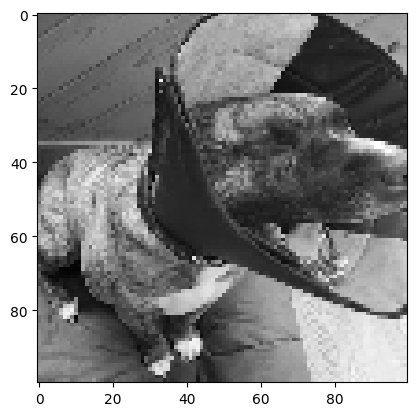

In [ ]:
dog_in = prepare(test_path)

plt.imshow(dog_in[0], cmap = 'gray')
plt.show()

In [ ]:
dog_in[0]

array([[[0.40392157],
        [0.40392157],
        [0.39215686],
        ...,
        [0.59607843],
        [0.60392157],
        [0.60784314]],

       [[0.38039216],
        [0.39607843],
        [0.4       ],
        ...,
        [0.6       ],
        [0.59607843],
        [0.61960784]],

       [[0.39607843],
        [0.39607843],
        [0.40392157],
        ...,
        [0.62352941],
        [0.60392157],
        [0.62745098]],

       ...,

       [[0.57254902],
        [0.55686275],
        [0.5254902 ],
        ...,
        [0.90980392],
        [0.89411765],
        [0.89019608]],

       [[0.49019608],
        [0.49803922],
        [0.47843137],
        ...,
        [0.90980392],
        [0.88627451],
        [0.89803922]],

       [[0.43137255],
        [0.43137255],
        [0.44705882],
        ...,
        [0.91764706],
        [0.89803922],
        [0.90196078]]])

Ensure that the array is normalized.  

In [ ]:
dog_in.max(), dog_in.min()

(0.9803921568627451, 0.043137254901960784)

In [ ]:
type(dog_in)

numpy.ndarray

In [ ]:
dog_in.shape

(1, 100, 100, 1)

## Use model to predict with test image

Use the neural network we created to predict whether the image is a dog or a cat.

In [ ]:
# make predictions based on testing picture
predictions = model.predict(dog_in)

1/1 [==============================] - 0s 184ms/step


In [ ]:
type(predictions)

numpy.ndarray

In [ ]:
predictions.shape

(1, 1)

With random state of 42:  
55% prediction that it is a cat when using an epoch of 1.
The closer to 1, it is a cat.  



In [ ]:
predictions

array([[0.4085037]], dtype=float32)

In [ ]:
filter = ( predictions > 0.5 )
filter[:10]


array([[False]])

In [ ]:
# Get class prediction by converting boolean to integers
class_pred = filter.astype("int32")
class_pred[0]

array([0], dtype=int32)

In [ ]:
results = {
  #"Truth": y_test[0],
  "Prediction": predictions[0],
  #"Class": class_pred [0],
}
results

{'Prediction': array([0.4085037], dtype=float32)}

Read, Write, and Display Images:

https://colab.research.google.com/drive/1qVdz2ClR9x2Ig7IezGSnw1K8qhBGRoGU?usp=sharing#scrollTo=gWLBDLQAvXDx

## Communication of Results


This project gave an appreciation for neural networks.  

Model was evaluated and the results showed loss: 0.4854 and accuracy: 0.7852

With random state of 42:  
55% prediction that it is a cat when using an epoch of 1.
The closer to 1, it is a cat.  

I experimented with choosing different random states.  Initially the random state was 42.  When it came to predicting whether our test image was a dog or cat (it is a dog in a cone), it was mostly predicting with a higher probability that the image was a cat.  This still occurred with 8 epochs.  As soon as I changed the random state to a 1, the model gave a probability that was closer to 0 (more accurately predicting a dog).

## **BONUS** (optional)



* Upload an image of your (or your friend's or family's) dog or cat and use your model to predict whether the image is a dog or cat.
* Hint: you'll probably need to convert the image from color to grayscale.  OpenCV, pillow, and other libraries are your friend.

In [ ]:
{
    "Version": "2012-10-17",
    "Statement": [
        {
            "Sid": "PublicReadGetObject",
            "Effect": "Allow",
            "Principal": "*",
            "Action": "s3:GetObject",
            "Resource": "arn:aws:s3:::ddc-datascience/*"
        }
    ]
}

{'Version': '2012-10-17',
 'Statement': [{'Sid': 'PublicReadGetObject',
   'Effect': 'Allow',
   'Principal': '*',
   'Action': 's3:GetObject',
   'Resource': 'arn:aws:s3:::ddc-datascience/*'}]}